In [1]:
library(tidyverse)
library(cowplot)
library(gridExtra)


`%+replace%` <- ggplot2::`%+replace%`

theme_zietzm <- function(base_size = 11.5, base_family = "") {
    # Starts with theme_bw and then modify some parts
    # Theme options are documentated at http://docs.ggplot2.org/current/theme.html
    ggplot2::theme_classic(base_size = base_size, base_family = base_family) %+replace%
    ggplot2::theme(

        strip.background  = ggplot2::element_rect(fill = NA, colour = 'grey90', size = 0),
        strip.text = element_text(vjust = 1, size = 10),
        plot.margin       = ggplot2::margin(t=2, r=2, b=2, l=2, unit='pt'),
        legend.spacing     = grid::unit(0.1, 'cm'),
        legend.key        = ggplot2::element_blank(),
        panel.border=element_rect(fill = NA, color = 'black', size = 0.5), 
        axis.line=element_line(size=0),
    )
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
hetionet_degree <- read_tsv('../../data/task1/hetionet_degrees.tsv')

hetionet_degree %>% head

Parsed with column specification:
cols(
  degree = col_double(),
  metaedge = col_character(),
  side = col_character(),
  square = col_logical()
)


degree,metaedge,side,square
<dbl>,<chr>,<chr>,<lgl>
7,AlD,source,FALSE
9,AlD,source,FALSE
6,AlD,source,FALSE
10,AlD,source,FALSE
9,AlD,source,FALSE
16,AlD,source,FALSE


In [3]:
hetionet_degree_plot <- hetionet_degree %>%
filter(str_detect(string = metaedge, pattern = 'CrC|AuG|AeG|G<rG|DaG|DdG')) %>%
unite('metaedge_side', c('metaedge', 'side'), remove = F) %>%
filter(!str_detect(string = metaedge_side, pattern = 'AeG_target|DaG_source|AuG_target|DdG_target')) %>%
mutate(
    metaedge_side = metaedge_side %>% recode_factor(
        AeG_source = 'Anatomy→\nexpresses→\nGene',
        AuG_source = 'Anatomy→\nupregulates→\nGene',
        CrC_square = 'Compound-\nresembles-\nCompound',
        DaG_target = 'Disease→\nassociates→\nGene',
        DdG_source = 'Disease→\nregulates→\nGene',
        'G<rG_source' = 'Gene→\nregulates→\nGene',
        'G<rG_target' = 'Gene←\nregulates←\nGene'
    )
) %>%
ggplot(aes(y = degree, x = metaedge_side)) +
geom_violin(scale = "width", fill = 'grey85') +
scale_y_log10() +
xlab('Network') +
ylab('Node degree') +
theme_zietzm()

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 46652 rows containing non-finite values (stat_ydensity).”Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 46652 rows containing non-finite values (stat_ydensity).”

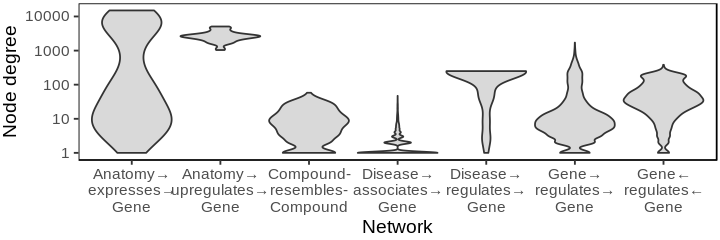

In [4]:
options(repr.plot.width=6, repr.plot.height=2)

ggsave('../../img/hetionet_degrees.png', hetionet_degree_plot, width = 6, height = 2, dpi = 400)

hetionet_degree_plot